In [6]:
##############################
#  화재학습
################################
# ------------------------------
#  YOLOv5v  download 
# ------------------------------
# !git clone  https://github.com/ultralytics/yolov5.git

# ------------------------------
# 패키지 설치 
# ------------------------------
# %cd /content/yolov5/
!pip install -r requirements.txt


# pyyaml error 날 때
# pip install --ignore-installed PyYAML   


  Using cached opencv_python-4.5.2.52-cp37-cp37m-manylinux2014_x86_64.whl (51.0 MB)
  Using cached PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)
  Using cached pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.3
ERROR: Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
You should consider upgrading via the '/home/ubuntu/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
# ------------------------------
# train , val  이미지 
# ------------------------------
# train > images , lables  
# val > images , lables  
# %cd ../
%cd ./fire_data/
from glob import glob 
# img_list = glob('/content/drive/MyDrive/fire_data/train/images/*.jpg')
# len(img_list)

train_img_list = glob('./train/images/*.jpg')
val_img_list = glob('./val/images/*.jpg')
print(len(train_img_list), len(val_img_list))


#  이미지셋 저장  이미지셋 저장 ( train, val)
with open('train.txt','w') as f:
  f.write('\n'.join(train_img_list)+'\n')
with open('val.txt','w') as f:
  f.write('\n'.join(val_img_list)+'\n')

/home/lab11/fire_data
1924 450


In [2]:
# ------------------------------
# # yaml dir 수정 
# ------------------------------
# %cd /content/drive/MyDrive/fire_data/
import yaml
with open('data.yaml','r') as f:
  data=yaml.load(f)
print(data)

data['train'] ='../fire_data/train.txt'
data['val'] ='../fire_data/val.txt'

with open('data.yaml','w') as f:
  yaml.dump(data,f)
print(data)

{'names': ['fire', 'fire-n', 'smoke', 'none'], 'nc': 4, 'train': '../fire_data/train.txt', 'val': '../fire_data/val.txt'}
{'names': ['fire', 'fire-n', 'smoke', 'none'], 'nc': 4, 'train': '../fire_data/train.txt', 'val': '../fire_data/val.txt'}


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


In [7]:
# --------------------------------
# train
# --------------------------------
%cd ../yolov5/
!python train.py --img 416 --batch 16 --epochs 200 --data ../fire_data/data.yaml --cfg ../yolov5/models/yolov5s.yaml  --weights yolov5l.pt --name train_model  --hyp ../yolov5/data/hyp.finetune.yaml --project ../fire_data  --exist-ok
# !python train.py --img 416 --batch 16 --epochs 100 --data /content/drive/MyDrive/fire_data/data.yaml --cfg ./models/yolov5s.yaml   --weights yolov5s.pt --name train_model  --project /content/drive/MyDrive/fire_data  --exist-ok --resume  --notest  

/home/lab11/yolov5
github: ⚠️ WARNING: code is out of date by 31 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 v5.0-90-g06372b1 torch 1.8.1+cu102 CUDA:0 (Tesla M60, 7618.8125MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='../yolov5/models/yolov5s.yaml', data='../fire_data/data.yaml', device='', entity=None, epochs=200, evolve=False, exist_ok=True, global_rank=-1, hyp='../yolov5/data/hyp.finetune.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='train_model', noautoanchor=False, nosave=False, notest=False, project='../fire_data', quad=False, rect=False, resume=False, save_dir='../fire_data/train_model', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5l.pt', workers=8, world_size=1)
tensorboard: Start with 'tensor

     6/199     1.41G   0.04883  0.009645   0.01455   0.07302        21       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697      0.0147      0.0495     0.00456     0.00119

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     7/199     1.41G   0.04841  0.009464   0.01441   0.07228        24       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697      0.0324      0.0148     0.00446    0.000707

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     8/199     1.41G   0.04773   0.00991   0.01427   0.07191        30       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697     0.00219       0.276     0.00184    0.000286

     Epoch   gpu_mem       box       obj       cls     total    labels


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    55/199     1.42G   0.02923  0.009985  0.006773   0.04598        10       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697       0.501       0.341       0.198      0.0684

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    56/199     1.42G   0.02922   0.01008  0.006746   0.04604        10       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697       0.476       0.247        0.18       0.057

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    57/199     1.42G   0.02871  0.009951  0.006688   0.04535        10       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697       0.493       0.325       0.222  

               Class      Images      Labels           P           R      mAP@.5
                 all         450         697       0.639       0.425       0.393       0.183

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   104/199     1.42G   0.02507  0.009246  0.005051   0.03937        23       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697       0.673       0.427       0.408       0.191

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   105/199     1.42G   0.02505  0.009003  0.004717   0.03877        21       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697        0.66        0.44       0.401       0.191

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   106/199     1.42G    0.0248  0.009045  0.004796   0.03864        13


     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   128/199     1.42G   0.02414  0.008945  0.004306   0.03739        12       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697       0.688       0.416       0.416       0.196

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   129/199     1.42G   0.02387  0.008835  0.004433   0.03714        16       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697        0.69       0.451       0.439       0.217

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   130/199     1.42G   0.02442  0.009062  0.004502   0.03798         9       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697        0.67       0.445       0.429  

               Class      Images      Labels           P           R      mAP@.5
                 all         450         697       0.727       0.429       0.453       0.231

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   177/199     1.42G    0.0232   0.00859  0.004087   0.03588        12       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697       0.709       0.458       0.458       0.236

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   178/199     1.42G   0.02307  0.008659   0.00406   0.03579        13       416
               Class      Images      Labels           P           R      mAP@.5
                 all         450         697       0.726       0.433       0.455       0.232

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   179/199     1.42G   0.02307  0.008497  0.004152   0.03572        15

200 epochs completed in 4.000 hours.

Optimizer stripped from ../fire_data/train_model/weights/last.pt, 14.4MB
Optimizer stripped from ../fire_data/train_model/weights/best.pt, 14.4MB


In [ ]:
# %cd  /content/drive/MyDrive/fire_data
# # tensorboard --logdir /content/drive/MyDrive/fire_data

# tensorboard %load_ext tensorboard
# %tensorboard --logdir /content/drive/MyDrive/fire_data

In [4]:
# image detection 
from IPython.display import  Image
import os

val_img_path =val_img_list[0]
#  ! 학습 결과 디렉토리에 맞게  모델 위치 변경 할것 
# !python detect.py  --weights runs/train/mask_test_result2/weights/best.pt  --img 416  --conf 0.5 --source "{val_img_path}"  --save-txt 
# !python detect.py  --weights 7/fire/weights/best.pt   --img 416  --conf 0.5 --source "{val_img_path}"  --save-txt 
!python detect_2.py  --weights ../fire_data/train_model/weights/best.pt  --img 416  --conf 0.5 --source ../fire_data/image6.jpg  --save-txt  --name result  --project ../fire_data  --exist-ok

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, line_thickness=3, name='result', nosave=False, project='../fire_data', save_conf=False, save_crop=False, save_txt=True, source='../fire_data/image6.jpg', update=False, view_img=False, weights=['../fire_data/train_model/weights/best.pt'])
YOLOv5 🚀 v5.0-90-g06372b1 torch 1.8.1+cu102 CUDA:0 (Tesla M60, 7618.8125MB)

Fusing layers... 
Model Summary: 224 layers, 7062001 parameters, 0 gradients, 16.4 GFLOPS
image 1/1 /home/lab11/yolov5/../fire_data/image6.jpg: 256x416 1 fire, Done. (0.019s)
Results saved to ../fire_data/result
11 labels saved to ../fire_data/result/labels
Done. (0.051s)


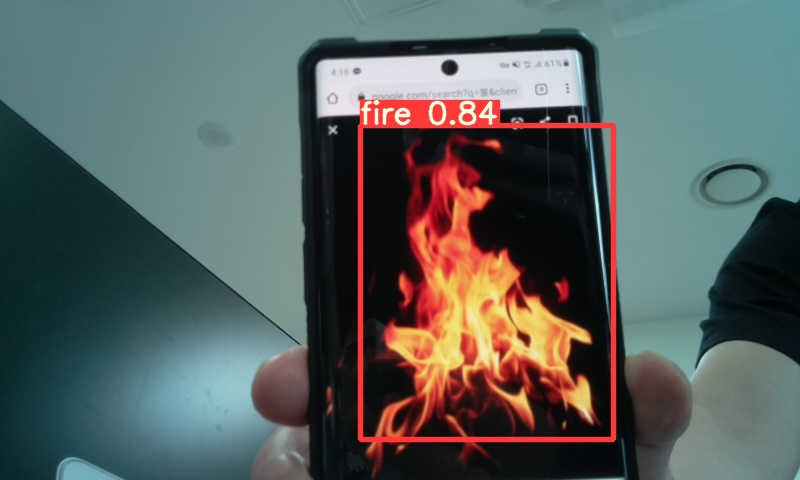

In [5]:
from IPython.display import  Image
# import os
# val_img_path =val_img_list[0]
Image( '../fire_data/result/image6.jpg')